In [1]:
import os 
import csv
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from general_plot import *



model_name = model_name_list[1] # Java_nio: 
all_mutants = list_dir(join_path("merged_mutants", f'{system_map[model_name][0]}'))

print(all_mutants)



In /home/nour/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/nour/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/nour/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


['32', '31', '30', '29', '28', '27', '26', '25', '24', '23', '22', '21', '20', '19', '18', '17', '16', '15', '14', '13', '12', '11', '10', '9', '8', '7', '6', '5', '4', '3', '2', '1', '0']


In [2]:
bes_lo_k_csv = pd.read_csv(os.path.join('csvs', f'killed_{model_name}_bes_loops.csv'))
rand_lo_k_csv = pd.read_csv(os.path.join('csvs', f'killed_{model_name}_random_loops.csv'))

bes_no_lo_k_csv = pd.read_csv(os.path.join('csvs', f'killed_{model_name}_bes_no_loops.csv'))
rand_no_lo_k_csv = pd.read_csv(os.path.join('csvs', f'killed_{model_name}_random_no_loops.csv'))

dfs = (bes_lo_k_csv, rand_lo_k_csv, bes_no_lo_k_csv, rand_no_lo_k_csv)

In [3]:
#calculate mutation score for each model = killed / all mutants
ms_bes_l = get_mutation_score(bes_lo_k_csv, all_mutants)
ms_rand_l = get_mutation_score(rand_lo_k_csv, all_mutants)
ms_bes_no_l = get_mutation_score(bes_no_lo_k_csv, all_mutants)
ms_rand_no_l = get_mutation_score(rand_no_lo_k_csv, all_mutants)

print(f'mutation score for bes_loop in model {model_name}: {ms_bes_l[1]} of {ms_bes_l[2]} = {ms_bes_l[0]*100}%')
print(f'mutation score for rand_loop in model {model_name}: {ms_rand_l[1]} of {ms_rand_l[2]} = {ms_rand_l[0]*100}%')
print(f'mutation score for bes_no_loop in model {model_name}: {ms_bes_no_l[1]} of {ms_bes_no_l[2]} = {ms_bes_no_l[0]*100}%')                    
print(f'mutation score for rand_no_loop in model {model_name}: {ms_rand_no_l[1]} of {ms_rand_no_l[2]} = {ms_rand_no_l[0]*100}%')




mutation score for bes_loop in model JavaNioServerSocket3: 12 of 33 = 36.36363636363637%
mutation score for rand_loop in model JavaNioServerSocket3: 13 of 33 = 39.39393939393939%
mutation score for bes_no_loop in model JavaNioServerSocket3: 10 of 33 = 30.303030303030305%
mutation score for rand_no_loop in model JavaNioServerSocket3: 12 of 33 = 36.36363636363637%


In [4]:
m_lists = get_killed_mutant_all(dfs)
(bes_m_l_list, rand_m_l_list, bes_m_no_l_list, rand_m_no_l_list) = m_lists 

d_map = {
    'bar_width' : 0.5, 
    'x_distance': 3,
    'fig_width' : 10,
    'fig_hight' : 5,
    'x_lim' : 25,
    'y_lim' : 200,
    
    'x_label': 'Killed mutant number', 
    'y_label': 'UnKnown', 
    'title': f"The different algorithms' performance on killed mutant for {model_name}",
    
    'bes_l_label': 'bes_loops',
    'random_l_label': 'random_loops',
    'bes_no_l_label': 'bes_no_self_loops',
    'random_no_l_label': 'random_no_self_loops' ,
    
    'model_name': model_name, 
    'comp_type' : "unknown"
    
    
}




labels: ['0', '2', '4', '7', '11', '12', '18', '19', '21', '23', '26', '27']
mutant 2 not_found
mutant 26 not_found
mutant 0 not_found
bes_l data: ['15', '188', '15', '15', '?', '204', '?', '6', '20', '20', '188', '22']
rand_l data: ['1', '4', '1', '1', '?', '1', '?', '1', '1', '1', '1', '1']
bes_no_l data: ['15', 0, '15', '15', '?', '175', '?', '6', '19', '19', 0, '18']
rand_no_l data: [0, '1', '1', '1', '?', '1', '?', '1', '1', '1', '1', '4']


ConversionError: Failed to convert value(s) to axis units: ['15', 0, '15', '15', '?', '175', '?', '6', '19', '19', 0, '18']

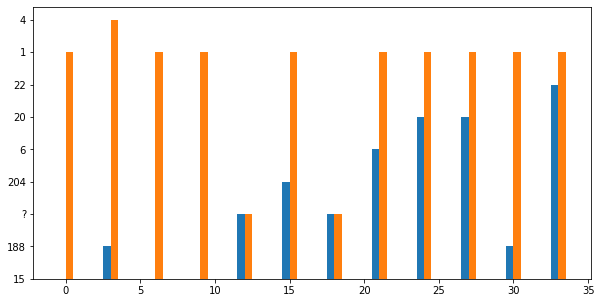

In [5]:

#################################
## Manually:
#################################

# actual_size

desired_mutants = m_lists[0][0:6]
desired_mutants = m_lists[0]


labels = desired_mutants
print(f'labels: {labels}')

creteria =  'actual_tests'# 'time_taken' # 'actual_tests'

c_lists = get_cretiera_all_desired_m(dfs, desired_mutants, creteria, 0)
(bes_lo_c, rand_lo_c, bes_no_lo_c, rand_no_lo_c) = c_lists

d_map['y_label'] = "Actual number of tests needed"
d_map['comp_type'] = creteria

plot_4_bars(labels, c_lists, d_map)


In [ ]:
# time_requierd

desired_mutants = m_lists[0][0:6]
desired_mutants = m_lists[0]


labels = desired_mutants
print(f'labels: {labels}')

creteria =  'time_taken'# 'time_taken' # 'actual_tests'

c_lists = get_cretiera_all_desired_m(dfs, desired_mutants, creteria, 0)
(bes_lo_c, rand_lo_c, bes_no_lo_c, rand_no_lo_c) = c_lists

d_map['comp_type'] = creteria

d_map['y_label'] = "Time taken until mutant get discovered"

# 'bar_width' : 0.5, 
#     'x_distance': 3,
#     'fig_width' : 10,
#     'fig_hight' : 5,
#     'x_lim' : 25,
d_map['y_lim'] = 1

plot_4_bars(labels, c_lists, d_map)



In [ ]:
# depth
creteria = 'depth'
c_lists = get_cretiera_only_2(dfs, desired_mutants, creteria, 0)
(bes_lo_c, bes_no_lo_c) = c_lists

d_map['comp_type'] = creteria

d_map['y_label'] = "Time taken until mutant get discovered"

# 'bar_width' : 0.5, 
#     'x_distance': 3,
#     'fig_width' : 10,
#     'fig_hight' : 5,
#     'x_lim' : 25,
d_map['y_lim'] = 8


plot_2_bars(labels, c_lists, d_map)

